In [9]:
# '''
# This block enables real-time update of imported python scripts.
# You don't have to refresh runtime / reimport ****.py files
# '''

# # for auto-reloading external modules
# # see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

In [10]:


from google.colab import drive
drive.mount('/content/drive')

!pwd
import os
os.chdir('/content/drive/My Drive/project/182 project')
!pwd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simulation

battery_params = pd.read_csv('HPPC_params.csv')


UDDS_current = pd.read_csv('LFP_UDDS.csv')
UDDS_current = UDDS_current[UDDS_current['Step Index']==6]
UDDS_current['Current (A)'] = -1*UDDS_current['Current (A)']
UDDS_current = UDDS_current.reset_index(drop=True)


Open_Circuit_Voltage = pd.read_csv('LFP_OCV.csv')
Open_Circuit_Voltage = Open_Circuit_Voltage[Open_Circuit_Voltage['Step Index'] == 6]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/11cHS9cF_h471_q21iEe4j9qhOXLS0xPm/project/182 project
/content/drive/.shortcut-targets-by-id/11cHS9cF_h471_q21iEe4j9qhOXLS0xPm/project/182 project


In [11]:
sim = simulation.SimClass(param = battery_params)

In [12]:
sim.param

,Unnamed: 0,R0,R1,R2,C1,C2,SOC,OCV
0,0,0.017616,0.020367,0.028242,2463.175100,54030.264244,0.9,3.332222
1,1,0.016954,0.028053,0.039490,3300.044311,37009.783689,0.8,3.333644
2,2,0.016966,0.018790,0.055802,5074.195760,23990.619931,0.7,3.308301
3,3,0.016916,0.018760,0.046272,4104.569765,37828.174209,0.6,3.290646
4,4,0.017290,0.024811,0.054308,2964.378288,33762.125489,0.5,3.294089
5,5,0.017394,0.031902,0.070503,3212.096617,28067.268284,0.4,3.288297
6,6,0.017569,0.030429,0.072964,2744.778062,29846.320314,0.3,3.257347
7,7,0.017546,0.036154,0.088265,2148.510151,25723.942841,0.2,3.231792
8,8,0.017733,0.064531,0.127677,1110.778668,17341.044739,0.1,3.187669
9,9,0.018239,0.408617,0.990389,293.309022,1965.278309,0.0,2.705502


In [13]:
sim.setOCV(Open_Circuit_Voltage, order = 24, figOn = 'On')

<ipython-input-13-1767c1612d84>:1: RankWarning: Polyfit may be poorly conditioned
  sim.setOCV(Open_Circuit_Voltage, order = 24, figOn = 'On')


# Generate Current Profile Here

In [14]:
'''
Note: POSITIVE current means DISCHARGE current
'''

'\nNote: POSITIVE current means DISCHARGE current\n'

In [15]:
'''
Use 'setCurrent(input)' to set current into 'self.current' in 'SimClass' class
input: 
  current profile. numpy array

'''

"\nUse 'setCurrent(input)' to set current into 'self.current' in 'SimClass' class\ninput: \n  current profile. numpy array\n\n"

0.02908798670179193
34821


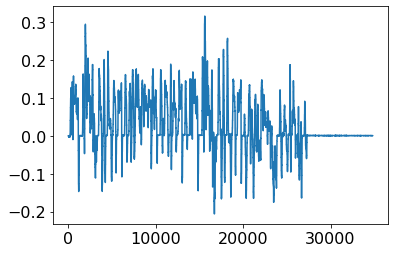

In [16]:
## Current Sample 1: UDDS (Urban Dynamometer Driving Schedule )

sim.setCurrent(0.1*UDDS_current['Current (A)'])
sim.current
plt.plot(sim.current)
print(np.mean(sim.current))
print(len(sim.current))

<class 'numpy.ndarray'>


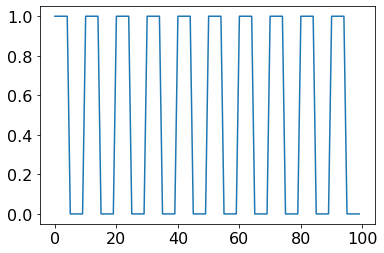

In [17]:
## Current Sample 2: Pulse Discharge Profile

N = 100 # sample count
P = 10  # period
D = 5   # width of pulse
discharge_pulse = np.arange(N) % P < D
discharge_pulse = discharge_pulse.astype(float)
print(type(discharge_pulse))
sim.setCurrent(discharge_pulse)
plt.plot(sim.current)

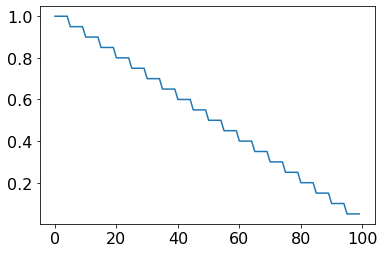

In [18]:
## Current Sample 3: Step Discharge Profile
discharge_step = np.ones([100,])
np.shape(discharge_step)

for k in range(1, 20):
    # print(k)
    discharge_step[5*k:(5*k)+5] = discharge_step[(5*k)-1] - 0.05
sim.setCurrent(discharge_pulse)
plt.plot(discharge_step)

(100,)


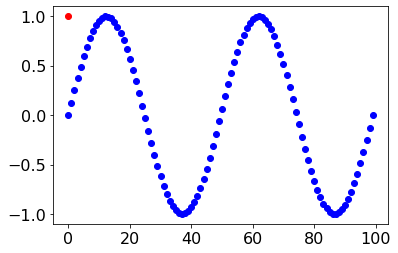

In [19]:
discharge_sin = np.sin(np.linspace(0, 4*np.pi, 100))
print(discharge_sin.shape)
plt.plot(discharge_sin, 'bo')
plt.plot(discharge_sin[12], 'ro')

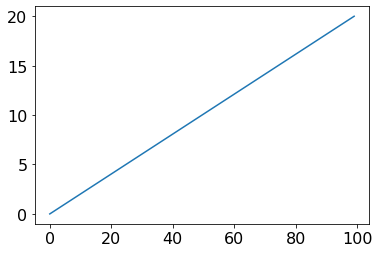

In [20]:
discharge_spike = 1/5*np.linspace(0,100,100)
discharge_spike
plt.plot(discharge_spike)


# Set initial SoC

In [21]:
# set initial SoC, [0, 1]

sim.setInitSoC(0.7)  
sim.init_SOC

0.7

# Set initial Temperature (Tc & Ts)

In [22]:
# set initial Tc(Core Temperature) & Ts(Surface Temperature)

sim.setInitTemp(Tc = 25, Ts = 25, Tf = 25)
print(sim.init_Tc)
print(sim.init_Ts)
print(sim.init_Tf)

25
25
25


# Simulation

k:  0


<ipython-input-23-efda78250a76>:4: RankWarning: Polyfit may be poorly conditioned
  sim.setOCV(Open_Circuit_Voltage, order = 24, figOn = 'OFF')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


k:  1000
k:  2000
k:  3000
k:  4000
k:  5000
k:  6000
k:  7000


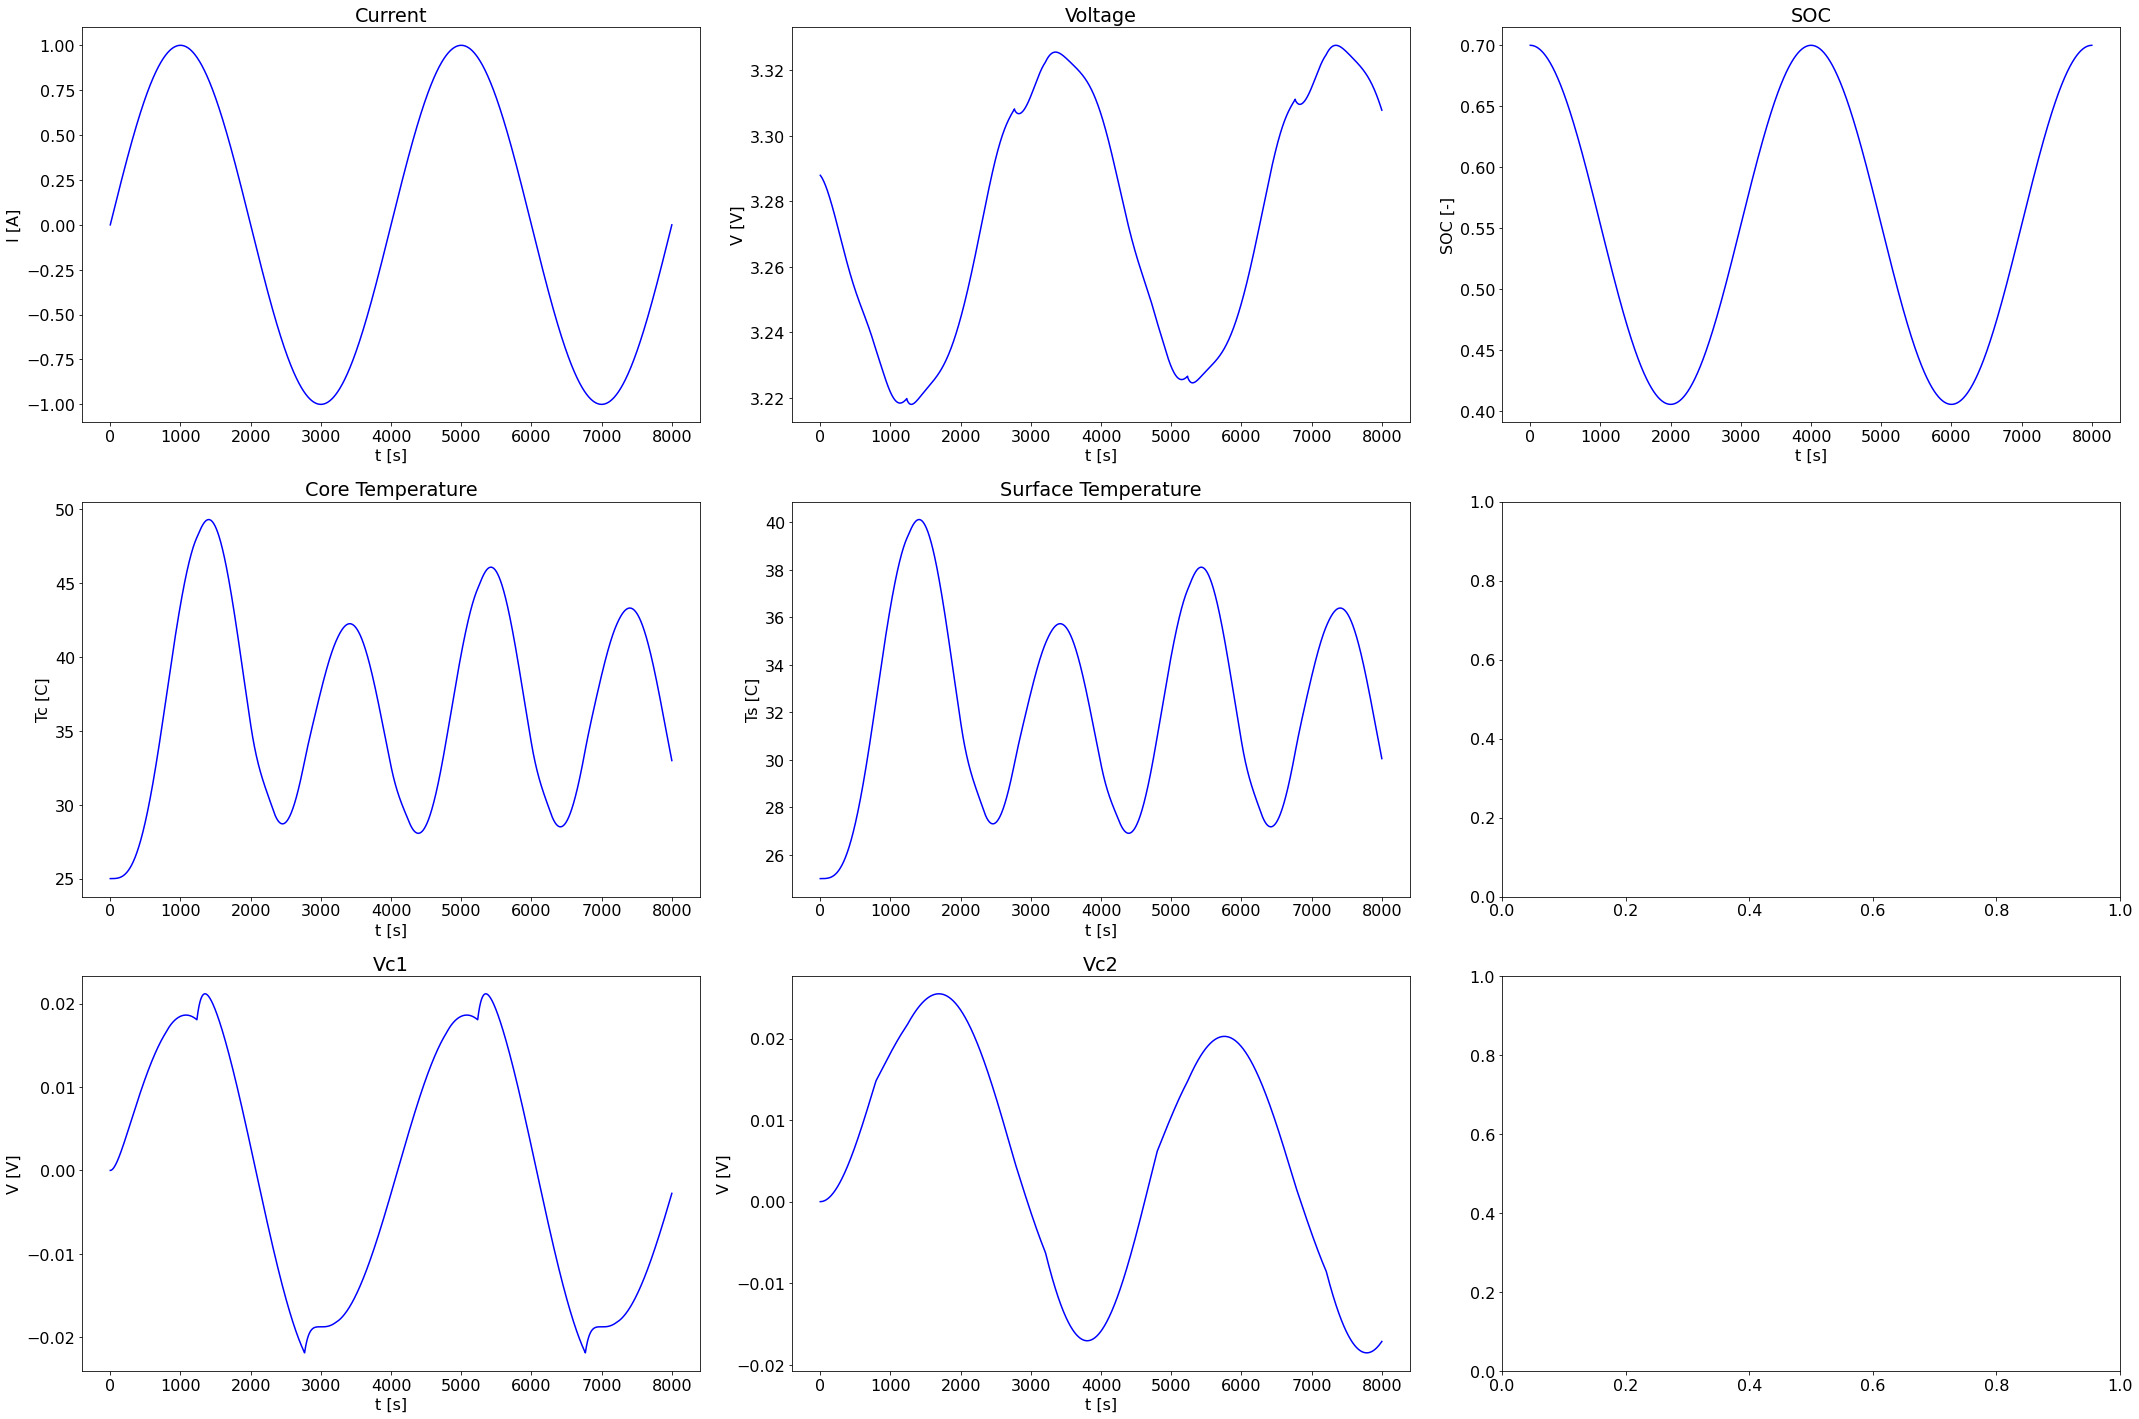

In [23]:
del sim

sim = simulation.SimClass(param = battery_params)
sim.setOCV(Open_Circuit_Voltage, order = 24, figOn = 'OFF')
sim.setInitSoC(0.7)  
sim.setInitTemp(Tc = 25, Ts = 25, Tf = 25)

discharge_sin = np.sin(np.linspace(0, 4*np.pi, 8001))  
# sim.setCurrent(0.1*UDDS_current['Current (A)'])
# sim.setCurrent(discharge_pulse)
# sim.setCurrent(discharge_step)
sim.setCurrent(discharge_sin)

sim_df = sim.runSimulation()

In [24]:
sim_df

,time,I,Tc,Ts,SOC,V,Vc1,Vc2
0,0,0.000000e+00,25.000000,25.000000,0.700000,3.287970,0.000000e+00,0.000000e+00
1,1,1.570796e-03,25.000000,25.000000,0.700000,3.287943,0.000000e+00,0.000000e+00
2,2,3.141587e-03,25.000000,25.000000,0.700000,3.287916,3.095654e-07,6.547541e-08
3,3,4.712372e-03,25.000000,25.000000,0.699999,3.287888,9.254488e-07,1.963772e-07
4,4,6.283144e-03,25.000001,25.000000,0.699998,3.287860,1.844436e-06,3.926561e-07
...,...,...,...,...,...,...,...,...
7996,7996,-6.283144e-03,33.087334,30.111284,0.699996,3.308140,-2.868498e-03,-1.719604e-02
7997,7997,-4.712372e-03,33.063070,30.096120,0.699998,3.308072,-2.839651e-03,-1.718346e-02
7998,7998,-3.141587e-03,33.038829,30.080971,0.699999,3.308004,-2.810797e-03,-1.717082e-02
7999,7999,-1.570796e-03,33.014613,30.065835,0.700000,3.307936,-2.781936e-03,-1.715813e-02


In [25]:
data = sim_df[['time', 'V', 'I', 'Ts', 'SOC', 'Tc']]
data.to_csv('transformer.csv', index = False)

In [ ]:
data = sim_df[['time', 'V', 'I', 'Ts', 'SOC', 'Tc']]
split = int(len(data)*0.8)
train = data[:split]
test = data[split:]
train.to_csv('transformer_train.csv', index = False)
test.to_csv('transformer_test.csv', index = False)

In [ ]:
data = sim_df[['V', 'I', 'Ts', 'SOC', 'Tc']]
split = int(len(data)*0.8)
train = data[:split]
test = data[split:]

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in ['V', 'I', 'Tc', 'Ts']:
    scale = StandardScaler().fit(train[[i]])
    train[i] = scale.transform(train[[i]])
    # transform the testing data column
    test[i] = scale.transform(test[[i]])


train[['prev_SOC', 'prev_Tc']] = train[['SOC', 'Tc']].shift(1)
train = train.iloc[1:]

test[['prev_SOC', 'prev_Tc']] = test[['SOC', 'Tc']].shift(1)
test = test.iloc[1:]


/var/folders/c4/16__49hs6rs6zc15z1bc89pc0000gn/T/ipykernel_29512/3131701448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i] = scale.transform(train[[i]])
/var/folders/c4/16__49hs6rs6zc15z1bc89pc0000gn/T/ipykernel_29512/3131701448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = scale.transform(test[[i]])
/var/folders/c4/16__49hs6rs6zc15z1bc89pc0000gn/T/ipykernel_29512/3131701448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
train.to_csv('lstm_train.csv', index = False)
test.to_csv('lstm_test.csv', index = False)